In [14]:
# 首先，加载上传的CSV文件以检查数据
import pandas as pd

# 加载数据
data_path = 'data.csv'
data = pd.read_csv(data_path)
# 计算 "Measured & Upscaled" 列的连续相邻数据的绝对偏差
# 创建一个表示绝对偏差的新列
data['Abs_Diff'] = data['Measured & Upscaled'].diff().abs()
data['Datetime'] = pd.to_datetime(data['Datetime'])
# 初始化一个空字典来存储出现死数的日期及其连续相邻数据绝对偏差等于0的个数
dead_number_dates = {}

# 遍历数据，查找绝对偏差等于0的连续段，并记录其开始日期和长度
current_count = 0  # 当前连续绝对偏差为0的计数
current_date = None  # 当前段的开始日期

for index, row in data.iterrows():
    if row['Abs_Diff'] == 0:
        # 绝对偏差为0，更新计数
        current_count += 1
        # 如果是连续段的开始，记录日期
        if current_count == 1:
            current_date = row['Datetime']
    else:
        # 绝对偏差不为0，检查之前的连续段
        if current_count >= 8:
            # 如果当前计数大于或等于8，记录此日期及其计数
            if current_date in dead_number_dates:
                dead_number_dates[current_date].append(current_count)
            else:
                dead_number_dates[current_date] = [current_count]
        # 重置计数和日期
        current_count = 0
        current_date = None

# 如果文件末尾有一个连续段，也需要检查
if current_count >= 8 and current_date is not None:
    if current_date in dead_number_dates:
        dead_number_dates[current_date].append(current_count)
    else:
        dead_number_dates[current_date] = [current_count]

# 返回出现死数的日期和它们的连续绝对偏差等于0的个数
print(dead_number_dates)


{Timestamp('2022-08-24 00:00:00'): [11], Timestamp('2022-08-18 00:00:00'): [21], Timestamp('2022-08-07 00:00:00'): [8], Timestamp('2022-07-23 00:00:00'): [9], Timestamp('2022-07-11 00:00:00'): [32], Timestamp('2022-07-08 00:00:00'): [14], Timestamp('2022-07-06 00:00:00'): [23], Timestamp('2022-06-27 00:00:00'): [9, 13], Timestamp('2022-06-13 00:00:00'): [21], Timestamp('2022-05-30 00:00:00'): [8, 19], Timestamp('2022-05-14 00:00:00'): [14], Timestamp('2022-05-09 00:00:00'): [9], Timestamp('2022-05-04 00:00:00'): [18], Timestamp('2022-05-01 00:00:00'): [9], Timestamp('2022-04-10 00:00:00'): [9], Timestamp('2022-03-24 00:00:00'): [14], Timestamp('2022-03-23 00:00:00'): [20], Timestamp('2022-01-25 00:00:00'): [9], Timestamp('2022-01-18 00:00:00'): [13, 9]}


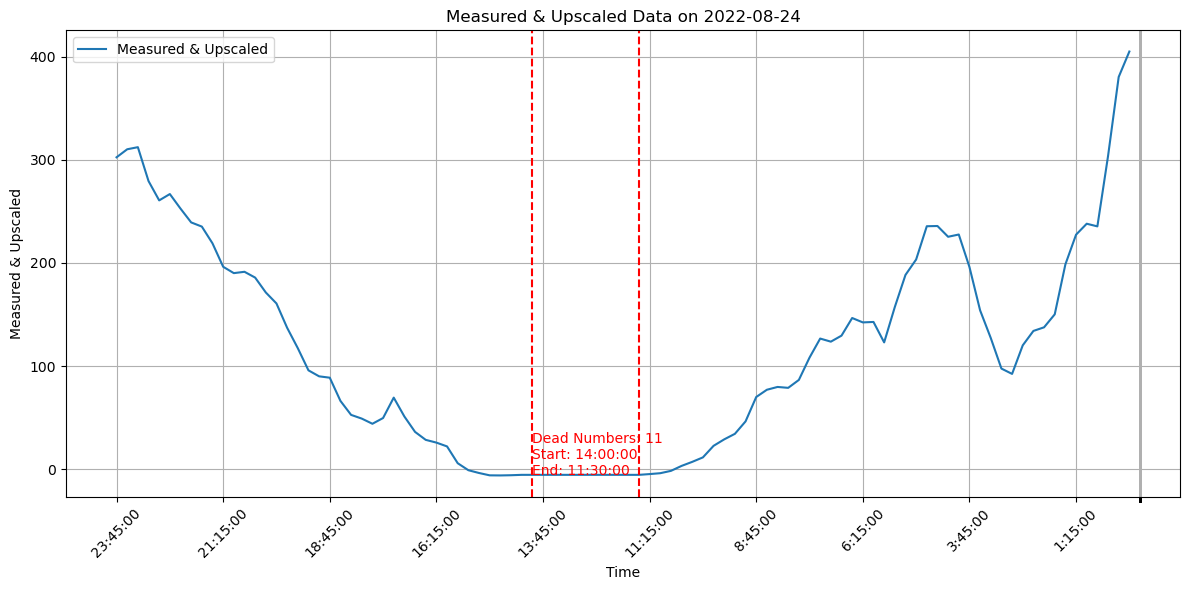

In [19]:
def plot_day_data_with_dead_numbers(date, data):
    """
    绘制指定日期的“Measured & Upscaled”数据，并用红色虚线标注死数出现的区间。
    同时，将死数出现的个数和开始和结束的具体时间标注在红色虚线的一侧。
    
    Parameters:
    - date: 指定的日期，格式为“YYYY-MM-DD”。
    - data: 包含数据的DataFrame。
    """
    # 过滤出指定日期的数据
    day_data = data[data['Datetime'].dt.date == pd.to_datetime(date).date()]
    
    # 检查是否有数据
    if day_data.empty:
        print("指定日期的数据不存在。")
        return

    # 准备时间轴标签，每隔10个显示一次
    time_labels = day_data['time'].tolist()
    time_labels = [label if idx % 10 == 0 else '' for idx, label in enumerate(time_labels)]
    
    # 绘制图表
    plt.figure(figsize=(12, 6))
    plt.plot(day_data['time'], day_data['Measured & Upscaled'], label="Measured & Upscaled")
    plt.title(f"Measured & Upscaled Data on {pd.to_datetime(date).date()}")
    plt.xlabel("Time")
    plt.ylabel("Measured & Upscaled")
    plt.xticks(time_labels, rotation=45)
    
    # 查找并标注死数区间
    current_count = 0  # 当前连续绝对偏差为0的计数
    start_idx = None  # 死数开始的索引
    for idx, (index, row) in enumerate(day_data.iterrows()):
        if row['Abs_Diff'] == 0:
            current_count += 1
            if current_count == 1:
                start_idx = idx
        else:
            if current_count >= 8:  # 根据题目要求，死数连续出现的次数阈值
                # 用红色虚线标注死数区间
                plt.axvline(x=day_data.iloc[start_idx]['time'], color='r', linestyle='--', label="Dead Number Start" if idx == 1 else "")
                plt.axvline(x=day_data.iloc[idx-1]['time'], color='r', linestyle='--', label="Dead Number End" if idx == 1 else "")
                # 标注死数出现的个数和开始结束时间
                plt.text(day_data.iloc[start_idx]['time'], day_data['Measured & Upscaled'].min(), f"Dead Numbers: {current_count}\nStart: {day_data.iloc[start_idx]['time']}\nEnd: {day_data.iloc[idx-1]['time']}", color='red')
            current_count = 0  # 重置计数

    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

# 以2022-08-18为例进行绘制，展示如何标注死数区间
plot_day_data_with_dead_numbers("2022-08-24", data)
